<hr>
<h1>Exoplanets</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
planets = sns.load_dataset('planets')

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [5]:
planets.shape

(1035, 6)

In [6]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


<img src="Exoplanetas.gif" width = 200 height = 200> 

In [7]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [8]:
planets['method'] = planets['method'].astype('category')

<h3>Time Analisys</h3>

In [9]:
planets['year'].value_counts()

2011    185
2012    140
2013    118
2010    102
2009     98
2008     74
2007     53
2014     52
2005     39
2002     32
2006     31
2004     26
2003     25
2000     16
1999     15
2001     12
1996      6
1998      5
1992      2
1995      1
1997      1
1989      1
1994      1
Name: year, dtype: int64

In [10]:
years = planets['year'].value_counts()
years.sort_index(inplace = True)

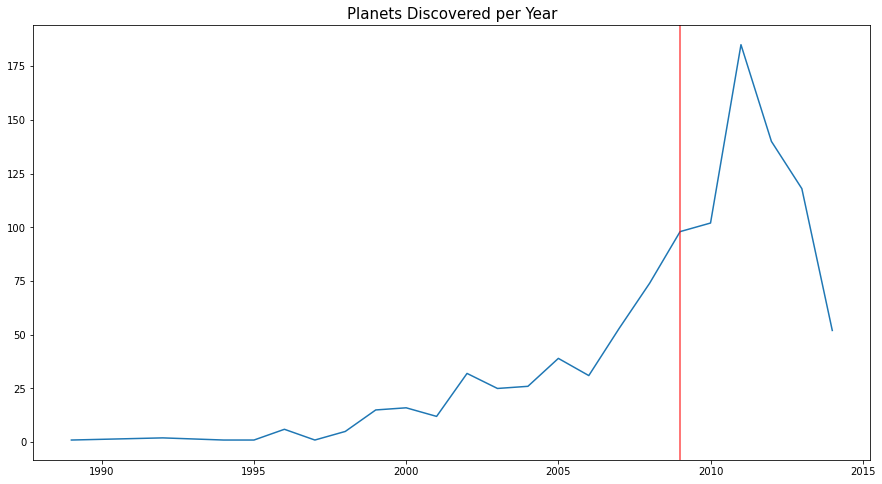

In [11]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.plot(years.index, years.values)
ax.set_title('Planets Discovered per Year', fontsize = 15)
ax.axvline(2009, color = 'r', alpha = 0.7);

This increase is [Kepler's fault](https://es.wikipedia.org/wiki/Kepler_(telescopio_espacial))

In [12]:
planets.pivot_table(values = 'number', index = 'year', columns = 'method', aggfunc = 'count')

method,Astrometry,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
year,,,,,,,,,,
1989,0,0,0,0,0,0,0,1,0,0
1992,0,0,0,0,0,2,0,0,0,0
1994,0,0,0,0,0,1,0,0,0,0
1995,0,0,0,0,0,0,0,1,0,0
1996,0,0,0,0,0,0,0,6,0,0
1997,0,0,0,0,0,0,0,1,0,0
1998,0,0,0,0,0,0,0,5,0,0
1999,0,0,0,0,0,0,0,15,0,0
2000,0,0,0,0,0,0,0,16,0,0


In [13]:
method_per_year = planets.pivot_table(values = 'number', index = 'year', columns = 'method', aggfunc = 'count')

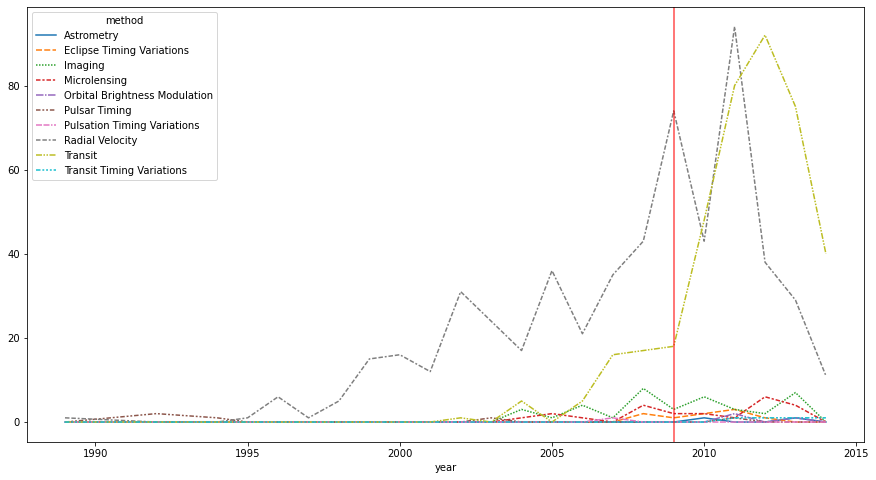

In [14]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.lineplot(data = method_per_year)
ax.axvline(2009, color = 'r', alpha = 0.7);

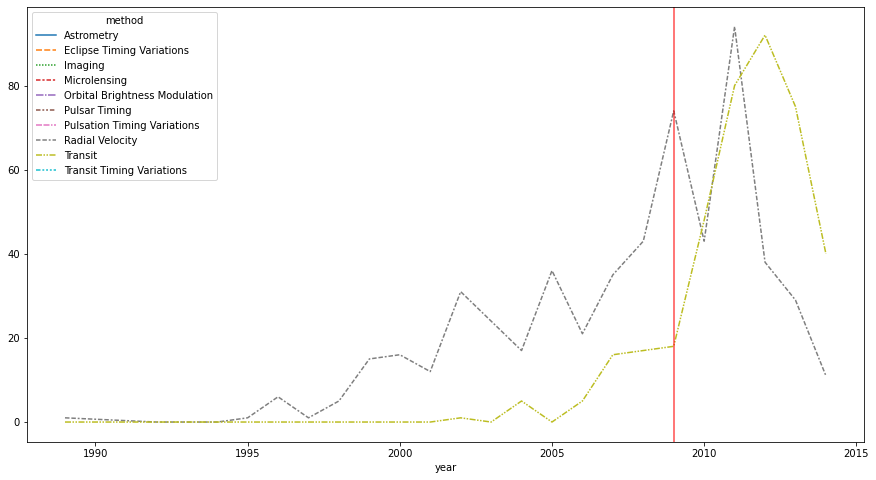

In [15]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.lineplot(data = method_per_year[['Radial Velocity', 'Transit']])
ax.axvline(2009, color = 'r', alpha = 0.7);

In [16]:
methods = planets.groupby('method')

In [17]:
for method, group in methods:
    print('{:30} Count = {}'.format(method, group.shape[0]))

Astrometry                     Count = 2
Eclipse Timing Variations      Count = 9
Imaging                        Count = 38
Microlensing                   Count = 23
Orbital Brightness Modulation  Count = 3
Pulsar Timing                  Count = 5
Pulsation Timing Variations    Count = 1
Radial Velocity                Count = 553
Transit                        Count = 397
Transit Timing Variations      Count = 4


the different methods detect planets with different characteristics?

In [18]:
planets = pd.read_csv('..\\data\\phl_exoplanet_catalog_2019.csv')

In [19]:
planets.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [20]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


[Click here to understand this disaster](http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database)


- P_DETECTION - planet detection method
- P_MASS - planet mass (earth masses)
- P_RADIUS - planet radius (earth radii)
- P_PERIOD - planet period (days)
- P_ECCENTRICITY - planet eccentricity
- S_DISTANCE - star distance (parsecs)
- S_MASS - star mass (solar units)
- S_RADIUS - star radius (solar units)

In [21]:
columns = ['P_DETECTION', 'P_MASS', 'P_RADIUS', 'P_ECCENTRICITY', 'S_DISTANCE', 'S_MASS', 'S_RADIUS']
planets = planets[columns]

In [22]:
planets.head()

,P_DETECTION,P_MASS,P_RADIUS,P_ECCENTRICITY,S_DISTANCE,S_MASS,S_RADIUS
0,Radial Velocity,6165.86330,NaN,0.231,93.37,2.70,19.00
1,Radial Velocity,4684.78480,NaN,0.080,125.72,2.78,29.79
2,Radial Velocity,1525.57440,NaN,0.000,75.59,2.20,11.00
3,Radial Velocity,1481.07850,NaN,0.370,17.94,0.90,0.93
4,Radial Velocity,565.73385,NaN,0.680,21.15,1.08,1.13


In [23]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P_DETECTION     4048 non-null   object 
 1   P_MASS          1598 non-null   float64
 2   P_RADIUS        3139 non-null   float64
 3   P_ECCENTRICITY  1380 non-null   float64
 4   S_DISTANCE      4042 non-null   float64
 5   S_MASS          3283 non-null   float64
 6   S_RADIUS        3723 non-null   float64
dtypes: float64(6), object(1)
memory usage: 221.5+ KB


In [24]:
planets['P_DETECTION'].value_counts()

Transit                          3114
Radial Velocity                   765
Microlensing                       78
Imaging                            47
Transit Timing Variations          18
Eclipse Timing Variations          11
Orbital Brightness Modulation       6
Pulsar Timing                       6
Pulsation Timing Variations         2
Astrometry                          1
Name: P_DETECTION, dtype: int64

In [25]:
to_remove = ['Pulsar Timing', 'Orbital Brightness Modulation',
             'Pulsation Timing Variations', 'Astrometry']

for m in to_remove:
    mask = planets['P_DETECTION'] == m
    idx = planets[mask].index
    
    planets.drop(idx, inplace = True)

In [26]:
planets['P_DETECTION'].value_counts()

Transit                      3114
Radial Velocity               765
Microlensing                   78
Imaging                        47
Transit Timing Variations      18
Eclipse Timing Variations      11
Name: P_DETECTION, dtype: int64

In [27]:
methods = planets.groupby('P_DETECTION')

In [28]:
for method, group in methods:
    print('{:30} Count = {}'.format(method, group.shape[0]))

Eclipse Timing Variations      Count = 11
Imaging                        Count = 47
Microlensing                   Count = 78
Radial Velocity                Count = 765
Transit                        Count = 3114
Transit Timing Variations      Count = 18


In [29]:
methods['P_MASS'].mean()

P_DETECTION
Eclipse Timing Variations    2555.316915
Imaging                      4262.759937
Microlensing                  644.194536
Radial Velocity               928.827704
Transit                       432.085127
Transit Timing Variations     265.226559
Name: P_MASS, dtype: float64

In [30]:
palette = sns.color_palette("Paired")
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

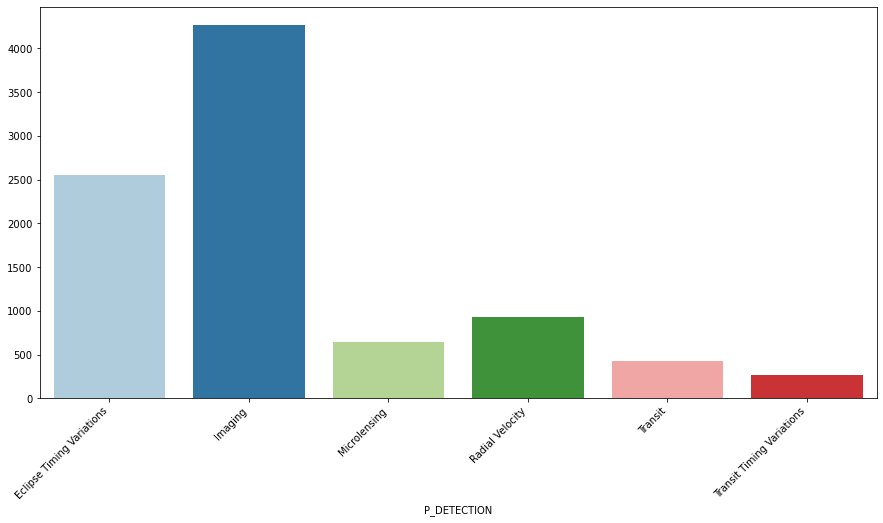

In [31]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = methods['P_MASS'].mean().index, y = methods['P_MASS'].mean().values, ax = ax,
           palette = palette)
fig.autofmt_xdate(rotation = 45);

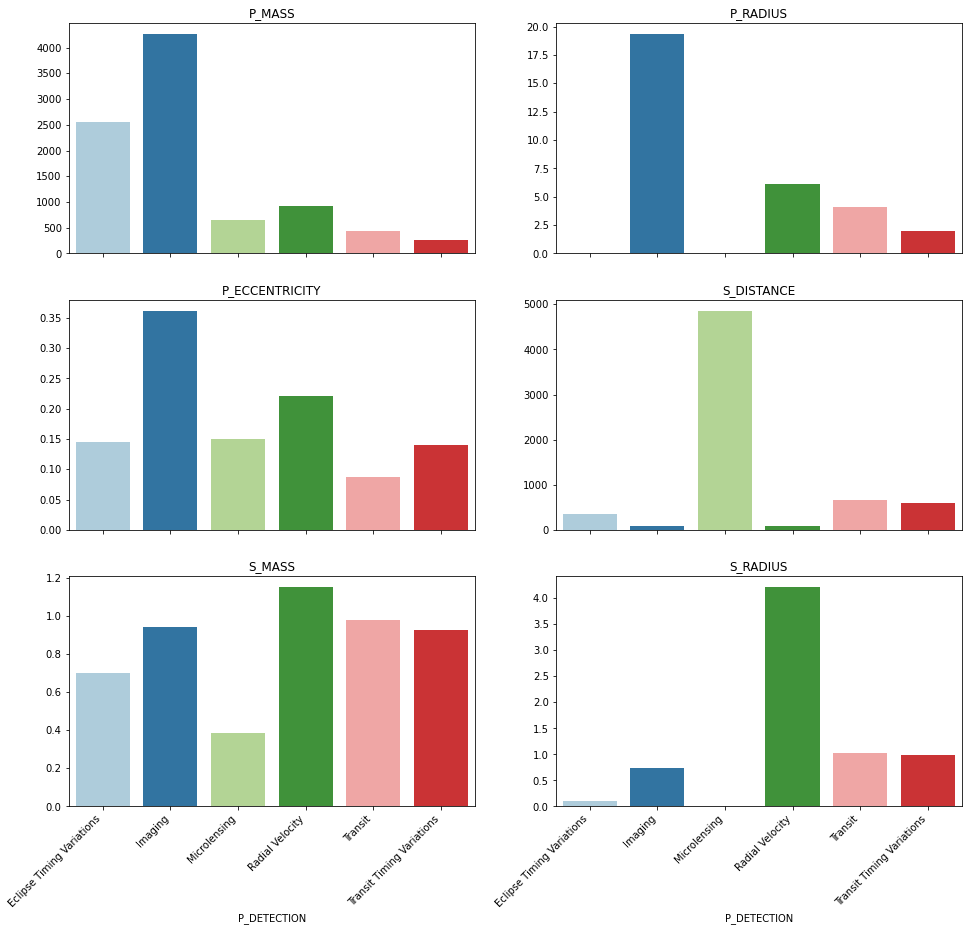

In [32]:
fig, axs = plt.subplots(3, 2, figsize = (16, 16))

index = 1
for ax in axs.flat:
    x = methods[columns[index]].mean().index
    y = methods[columns[index]].mean().values
    
    sns.barplot(x = x, y = y, ax = ax, palette = palette)
    ax.set_title('{}'.format(columns[index]))
    fig.autofmt_xdate(rotation = 45)
    
    index += 1

**P_MASS**

In [33]:
methods['P_MASS'].mean()

P_DETECTION
Eclipse Timing Variations    2555.316915
Imaging                      4262.759937
Microlensing                  644.194536
Radial Velocity               928.827704
Transit                       432.085127
Transit Timing Variations     265.226559
Name: P_MASS, dtype: float64

**P_RADIUS**

In [34]:
methods['P_RADIUS'].mean()

P_DETECTION
Eclipse Timing Variations          NaN
Imaging                      19.344256
Microlensing                       NaN
Radial Velocity               6.147392
Transit                       4.108566
Transit Timing Variations     2.004989
Name: P_RADIUS, dtype: float64

**P_ECCENTRICITY**

In [35]:
methods['P_ECCENTRICITY'].mean()

P_DETECTION
Eclipse Timing Variations    0.145556
Imaging                      0.362000
Microlensing                 0.150000
Radial Velocity              0.221056
Transit                      0.086608
Transit Timing Variations    0.140326
Name: P_ECCENTRICITY, dtype: float64

In [ ]:
import pingouin as pg 

In [ ]:
pg.anova(data = planets, dv = 'P_ECCENTRICITY', between = 'P_DETECTION', detailed = True)

In [ ]:
pg.pairwise_tukey(data = planets, dv = 'P_ECCENTRICITY', between = 'P_DETECTION')

**S_DISTANCE**

In [ ]:
methods['S_DISTANCE'].mean()

**S_MASS**

In [ ]:
methods['S_MASS'].mean()

**S_RADIUS**

In [ ]:
methods['S_RADIUS'].mean()


- The Eclipse Timing Variations method favors massive planets but is not useful for estimating their radius.

- The Microlensing method favors planets in very distant stars.

- The Radial Velocity method favors massive star systems and planets